## Deep Neural Network Sequential Model On Mnist Digits Dataset

### MNIST digits image dataset

##### About Dataset

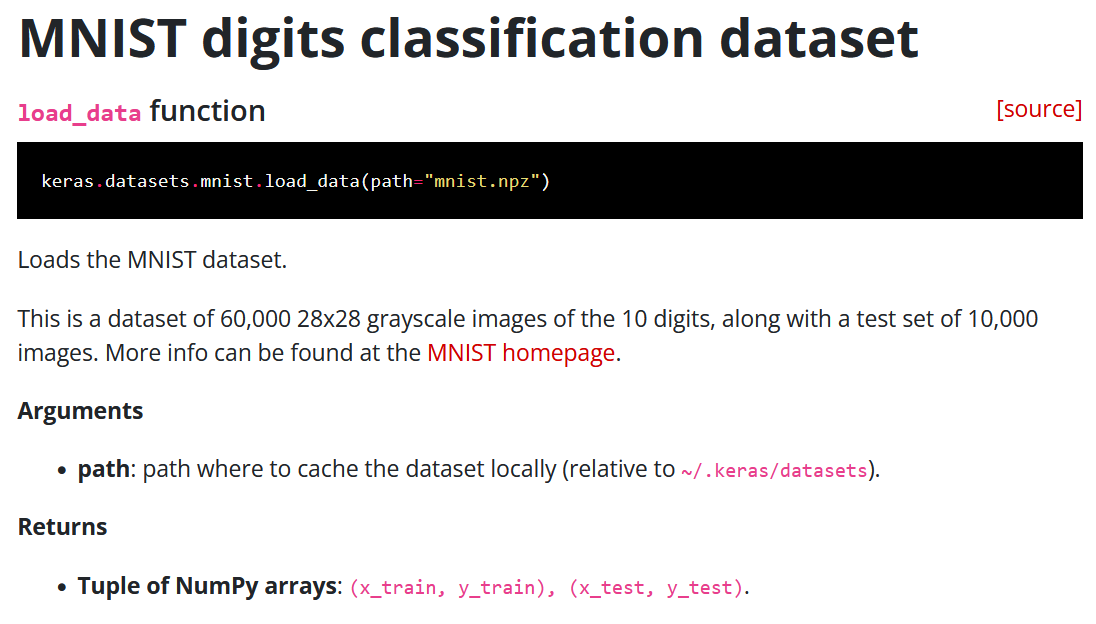

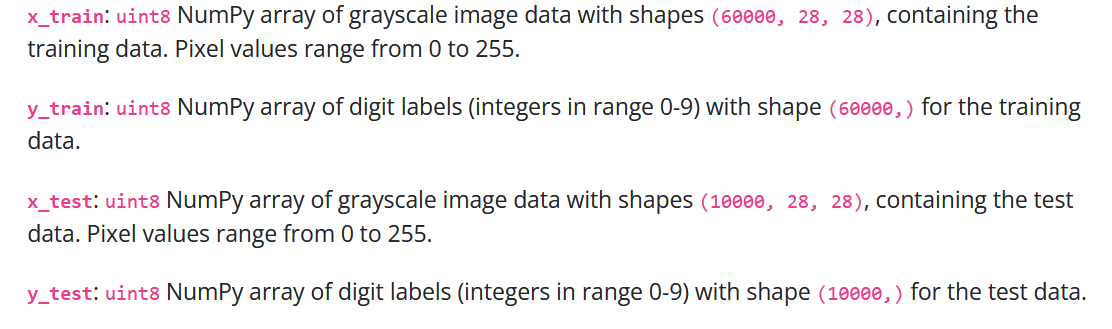

#### Import Basic Packages of DL

In [1]:
import tensorflow as tf
from tensorflow import keras
from keras.layers import Dense , Flatten , Dropout , BatchNormalization
from keras import Sequential

In [2]:
import warnings
warnings.filterwarnings('ignore')

#### Import Dataset from keras (Its inbuilt)

In [3]:
df = keras.datasets.mnist.load_data()

In [4]:
df

((array([[[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         ...,
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0

#### split the data into train input and output test input and output

In [5]:
(x_train , y_train) , (x_test , y_test) = df

In [6]:
print(x_train.shape , x_test.shape , y_train.shape , y_test.shape)

(60000, 28, 28) (10000, 28, 28) (60000,) (10000,)


#### Inisghts : split the data as per given

##### insights : 60000 images for training and 10000 images for testing

#### we want check how digits images look like

##### Import package for visualizing images

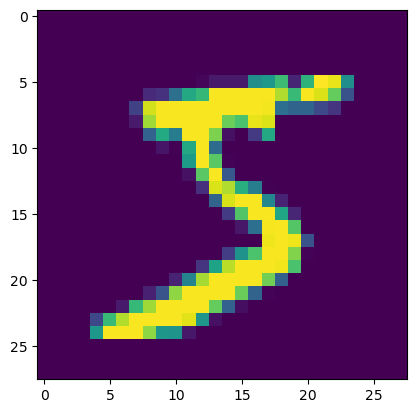

In [7]:
import matplotlib.pyplot as plt
plt.imshow(x_train[0])
plt.show()

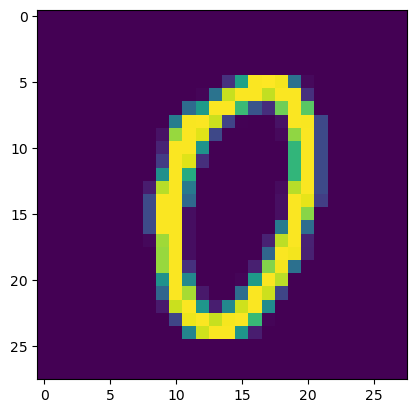

In [8]:
plt.imshow(x_train[1000])
plt.show()

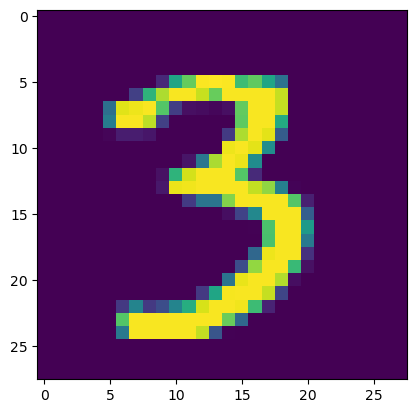

In [9]:
plt.imshow(x_train[10000])
plt.show()

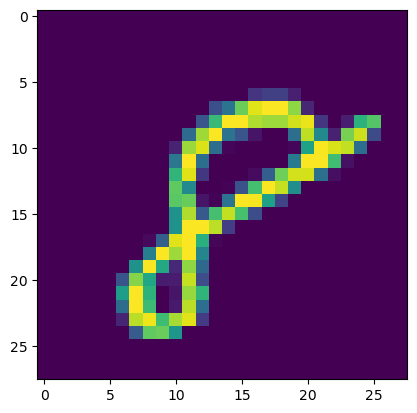

In [10]:
plt.imshow(x_train[59999])
plt.show()

#### Performing Feature Scaling ( Its mandetory step)

#### In image dataset , we always doing feature scaling by normalization only

#### Because image exist between 0 to 255 . so when 0/255 is 0 and 255 / 255 then 1 only. so data exist between 0 to 1 only 

In [11]:
x_train = x_train / 255.0
x_test = x_test / 255.0

#### Insights : Data get scaled. (by divide 255 only) Data get exist between 0 to 1 only.

#### Visualization of multiple images of training

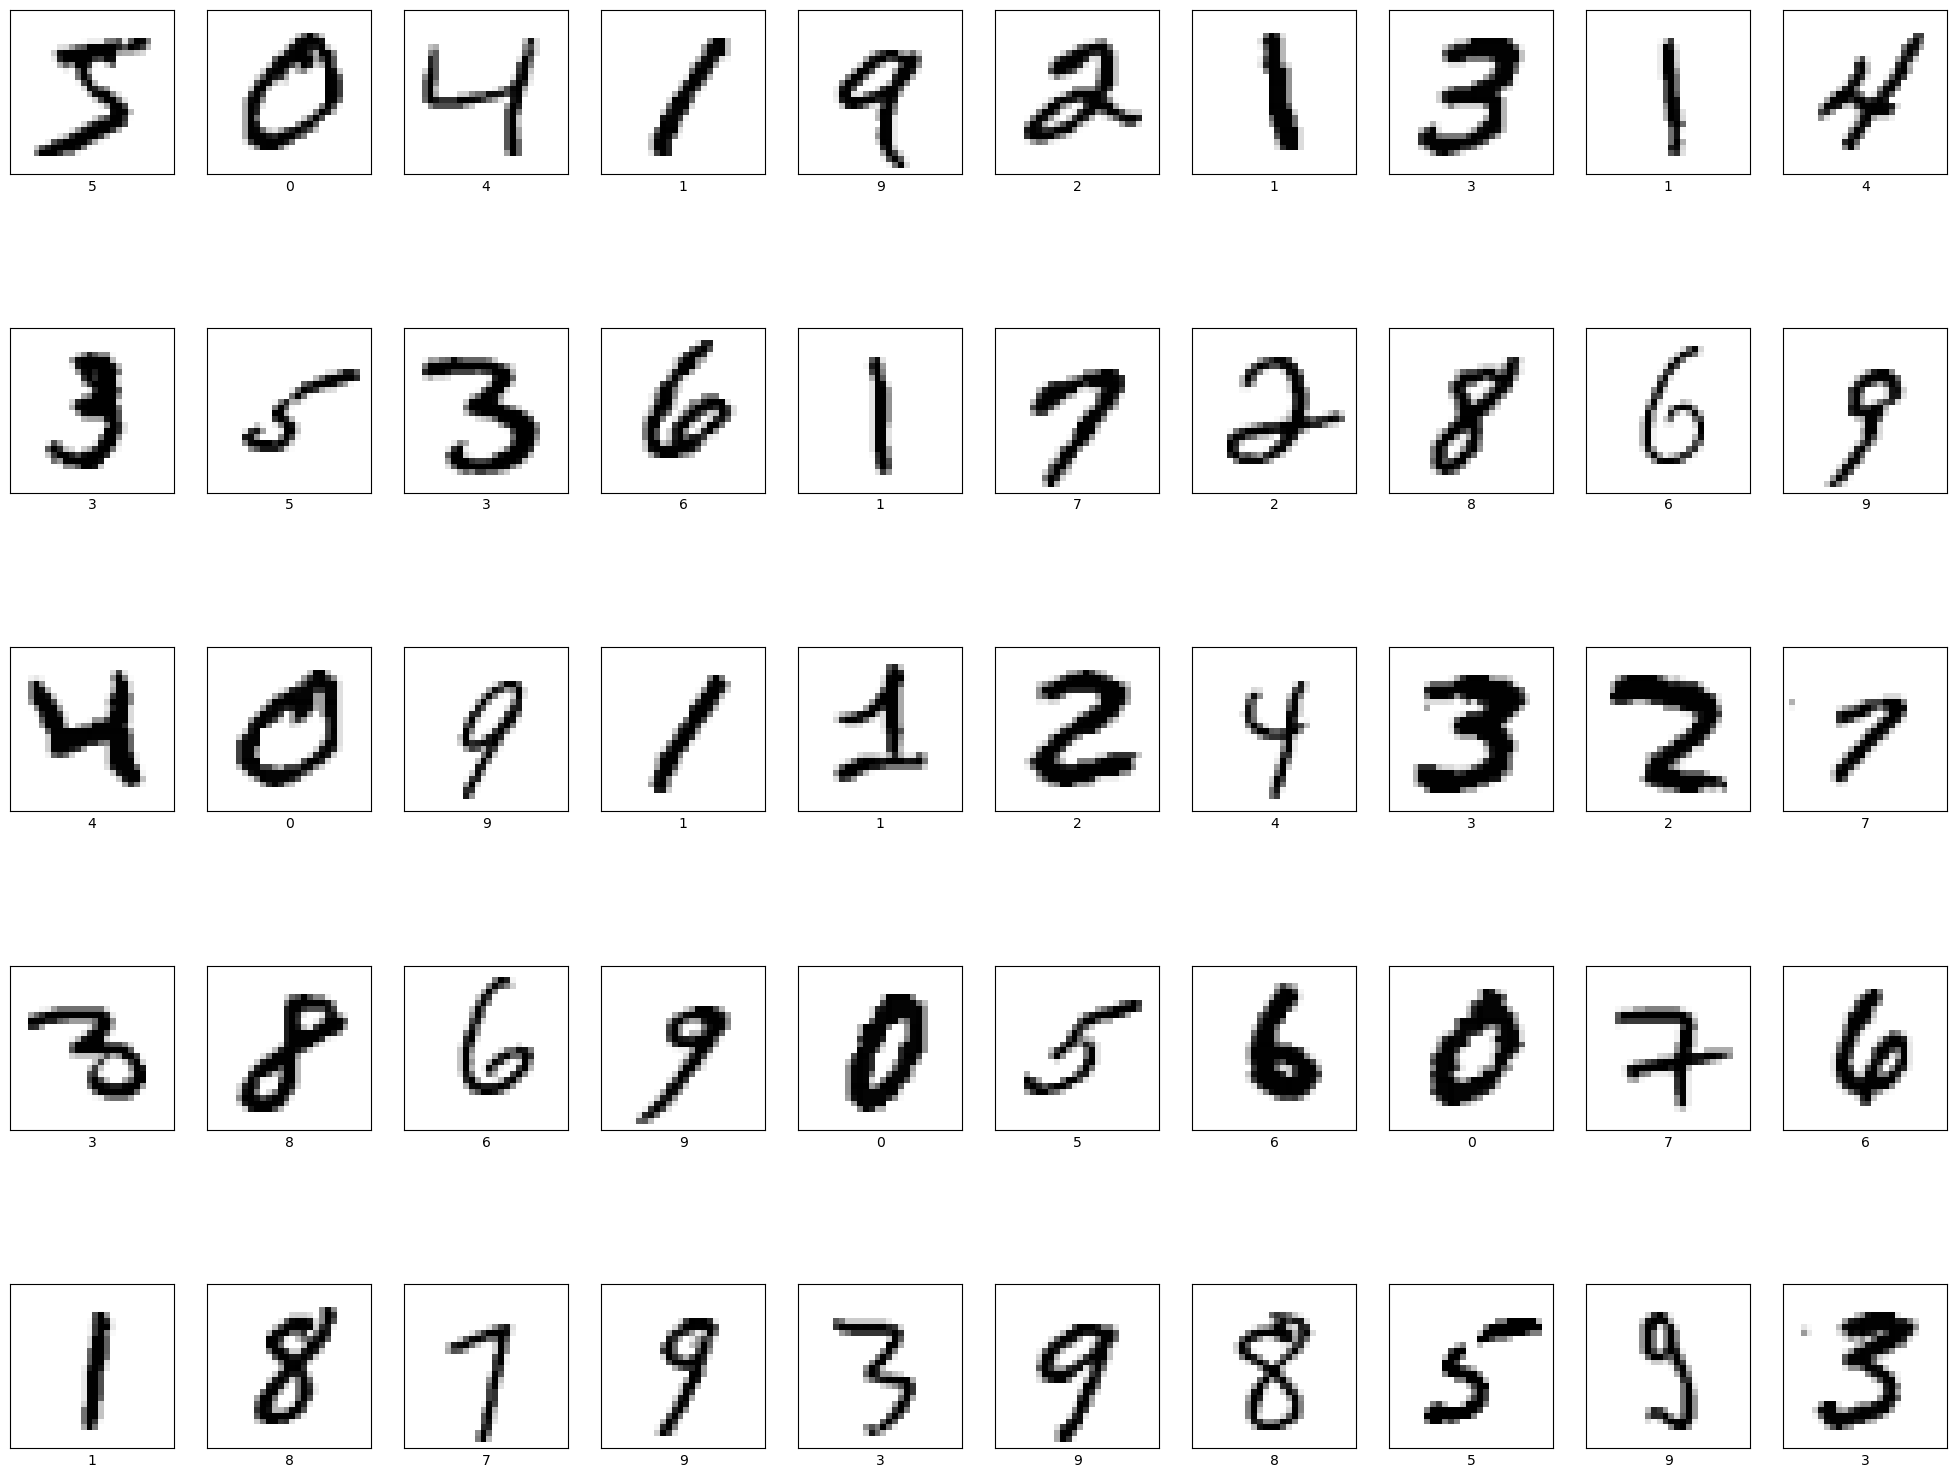

In [12]:
plt.figure(figsize = (25 , 20))
for image in range(50):
    
    plt.subplot(5 , 10 , image + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[image] , cmap = plt.cm.binary)
    plt.xlabel(y_train[image])
plt.show()

#### Visualizing multiple images of testing

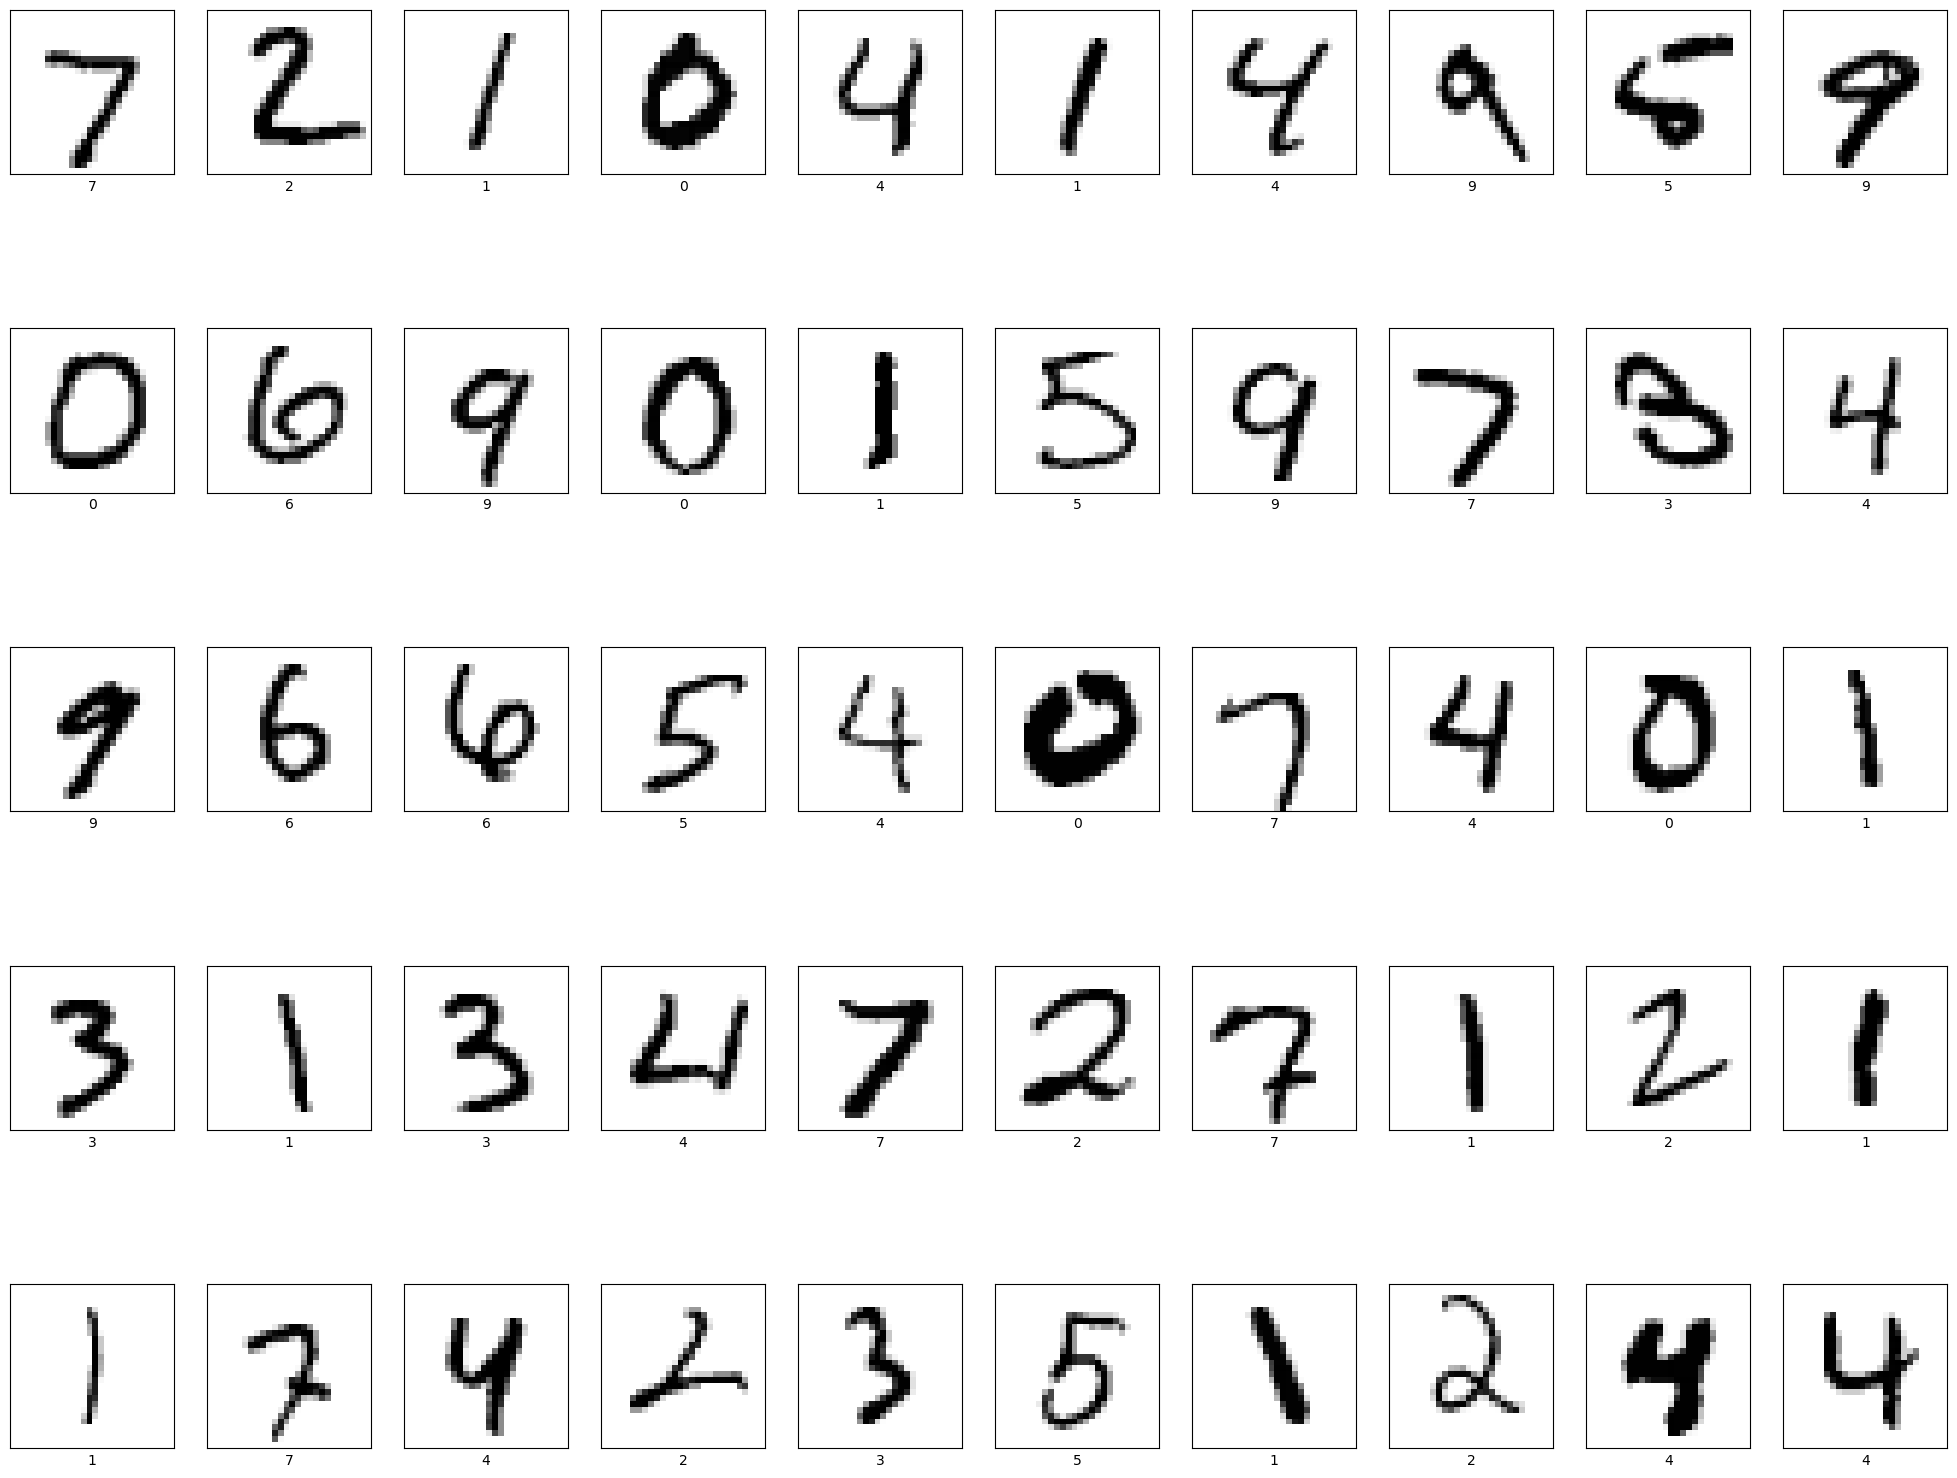

In [13]:
plt.figure(figsize = (25 , 20))

for image in range(50):
    
    plt.subplot(5 , 10 , image + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_test[image] , cmap = plt.cm.binary)
    plt.xlabel(y_test[image])
    
plt.show()

## Building Multi Layer Perceptron 

### EarlyStopping

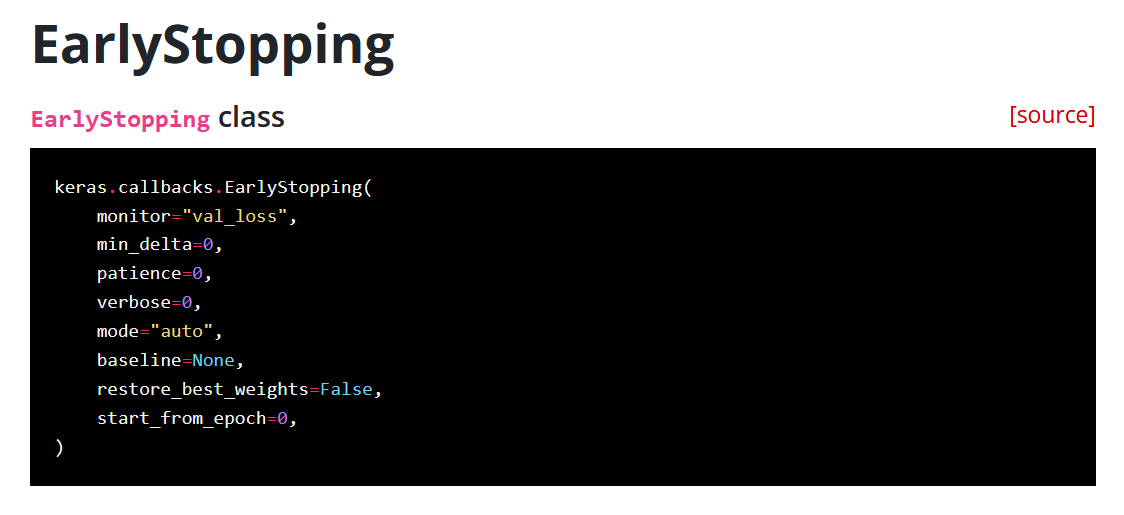

In [14]:
from keras.callbacks import EarlyStopping

In [15]:
callback = EarlyStopping(monitor='val_accuracy',
    min_delta=0.01,
    patience=20,
    verbose=1)

#### Monitor : In monitor , we can mention two things 1.val_loss 2.val_accuracy . Monitoring the model on the basis of this parameters . It depends on you which you are prefer
#### min_delta : It is learning rate (eta) , this value exist between 0.0 to 1.0
#### patience : patience is nothing but  how much times you want same accuracy..... after this limit you can consider our accuracy is not will increment....
####            eg : If we give patience = 20 , means if we get get same accuracy continously so I need to stop somewhere .... so here if i get continously accuracy 20 times (there is no change into it in increament wise).... then i decide i want this contnious accuracy for 20 times(my limitation)..... means If i get 20 times same accuracy then I will stop it.
#### Verbose : It gives epochs value (how many times epoch get work to reach this max accuracy) eg : 24 epoch is needed for this model to reach max accuracy . that epoch is shown verbose when verbose = 1

#### EarlyStopping is the technique which automatically stops the epochs / iterations when you get max accuracy or when you get continous same accuracy where increament not happened or no convergence

### Sequential model

In [16]:
model = Sequential()

#### Before that we need to convert that images data into one Dimension only

In [17]:
model.add(Flatten(input_shape = (28 , 28)))

#### It take input data as shape of images and get convert into 1D

#### After converting in 1D then data is 28 * 28 = 784

#### Input value for sequential model is 784 and output(neuron) is  128

#### Fully connected 1st hidden layer

In [18]:
model.add(Dense(units = 128 ,  activation = 'relu'))

In [19]:
#model.add(Dropout(0.25))

#### Fully connected 2nd hidden layer

In [20]:
model.add(Dense(units = 32 , activation = 'relu'))

In [21]:
#model.add(Dropout(0.25))

#### Output Layer

In [22]:
model.add(Dense(units = 10 , activation = 'softmax'))

##### Architecture operation parameters

In [23]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten (Flatten)                    │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │         100,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 32)                  │           4,128 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 10)                  │             330 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 104,938 (409.91 KB)

 Trainable params: 104,938 (409.91 KB)

 Non-trainable params: 0 (0.00 B)

#### Compile the model

In [24]:
model.compile(optimizer = 'adam' , loss = 'sparse_categorical_crossentropy' , metrics = ['accuracy'])

##### Insights : For loss , if problem is binary classification then binary_crossentropy
##### multiclass classification then categorical_crossentropy
##### for image data for classification use sparse_categorical_crossentropy
##### sparse means more no of zeros

##### Optimization is speed up your performance(means it reaches your error to global minima) 

#### Fit the model

In [25]:
history = model.fit(x_train , y_train , validation_data = (x_test , y_test) ,epochs = 1000 , callbacks = callback)

Epoch 1/1000
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 13s 5ms/step - accuracy: 0.8756 - loss: 0.4381 - val_accuracy: 0.9636 - val_loss: 0.1232
Epoch 2/1000
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.9680 - loss: 0.1091 - val_accuracy: 0.9649 - val_loss: 0.1150
Epoch 3/1000
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 19s 10ms/step - accuracy: 0.9780 - loss: 0.0719 - val_accuracy: 0.9735 - val_loss: 0.0870
Epoch 4/1000
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 20s 10ms/step - accuracy: 0.9829 - loss: 0.0547 - val_accuracy: 0.9772 - val_loss: 0.0770
Epoch 5/1000
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 15s 8ms/step - accuracy: 0.9866 - loss: 0.0427 - val_accuracy: 0.9746 - val_loss: 0.0826
Epoch 6/1000
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 19s 10ms/step - accuracy: 0.9891 - loss: 0.0326 - val_accuracy: 0.9761 - val_loss: 0.0844
Epoch 7/1000
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 18s 10ms/step - accuracy: 0.9911 - loss: 0.0274 - val_accuracy: 0.9783 - val_loss: 0.0796
Epoch 8/1000
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 16s 8ms/step - accura

##### Batch size = 32 means  for 1 epoch it take (Training data)60000 / 32 = 1875 batch process for per epoch

#### Insights : Here I gave epochs = 1000 . means I want to epochs 1000 means for best accuracy and min loss . but after that I gave callbacks = callback means I gave EarlyStopping . I gave EarlyStopping value is 20(patience) .... means I want same continous accuracy for 20 times after that I want to intentionally stops the iteration without any error. Here , means I get accuracy repeatedly without any increament that time it no make any sense to peform again and again epochs / iterations.(It make slow performance and time consuming and not get imprivement in performance(accuracywise) also) so If I get 20 times same accuracy getting (continously) without any increament then I decide I want to after 20 .  

#### Here I gave 1000 epoch but it stops at 24 epoch only i.e. due to earlyStopping (without Dropout or BatchNormalization). Where its accuracy is not change ftom 4th epoch  val_accuracy is  0.9772 and 24th epoch val accuracy is 0.9974 . it complete 20 patience

##### Insights : at last it shows Epoch 24 Early Stopping means it take 20 (iterations) (patience) to reach early stopping.  means it check 20 times but accuracy is not increasing then it decide to stop epochs automatically . it takes toatl no of peochs are 24 and 20 patience means 20 check accuracy is not increasing. this 20 value given by our side 

#### Prediction Output of training

In [26]:
y_train_pred = model.predict(x_train)

1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step


In [27]:
y_train_pred

array([[8.75785903e-32, 1.14782171e-17, 3.37627857e-30, ...,
        6.46065091e-23, 4.67227143e-22, 5.63786105e-13],
       [1.00000000e+00, 2.44169158e-18, 3.46509896e-14, ...,
        8.74439186e-20, 3.50853808e-23, 2.62384065e-20],
       [2.16482769e-19, 4.80011050e-13, 2.98793569e-13, ...,
        2.15551101e-12, 1.77016583e-12, 2.17654697e-13],
       ...,
       [7.74397695e-26, 1.85201345e-20, 4.79063417e-36, ...,
        2.08265388e-22, 8.97402787e-18, 1.91863109e-10],
       [9.47114227e-14, 7.06543103e-18, 1.55807560e-14, ...,
        9.83463523e-25, 4.38714955e-15, 4.96451185e-21],
       [4.10848196e-11, 3.77825410e-11, 1.54750268e-10, ...,
        9.76496228e-12, 1.00000000e+00, 1.11487305e-10]], dtype=float32)

#### Prediction Output of testing

In [28]:
y_test_pred = model.predict(x_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


In [29]:
y_test_pred

array([[2.8607548e-17, 2.6501205e-16, 3.5902258e-12, ..., 1.0000000e+00,
        1.8751246e-12, 1.2454226e-11],
       [2.1112649e-12, 6.6632666e-08, 9.9999988e-01, ..., 1.5075875e-23,
        4.4014837e-14, 2.1007680e-28],
       [3.2195708e-11, 9.9999166e-01, 1.0433419e-10, ..., 1.9593796e-07,
        2.2845751e-07, 3.2146399e-13],
       ...,
       [2.3643270e-29, 2.8460774e-20, 4.6892004e-29, ..., 4.4823334e-10,
        2.4043067e-16, 1.5116098e-12],
       [1.6983666e-15, 4.9737715e-17, 3.4376379e-20, ..., 1.8622286e-09,
        1.4425728e-08, 7.1266230e-21],
       [1.0020514e-21, 2.5936329e-24, 1.2277720e-21, ..., 6.2436773e-31,
        2.6109246e-17, 1.3834034e-23]], dtype=float32)

#### Here problem is multiclass classification so we use softmax activation function and softmax gives more than one possibilities and from that possibilities which one has highest probability that should be output

#### For that reason we need to calculate highest probability output from prediction output of testing

In [30]:
y_pred_test = y_test_pred.argmax(axis = 1)

In [31]:
y_pred_test

array([7, 2, 1, ..., 4, 5, 6], dtype=int64)

##### Performance metrics

In [32]:
from sklearn.metrics import accuracy_score

#### Testing Accuracy of sequential model

In [33]:
val_accuracy = accuracy_score(y_test , y_pred_test )

In [34]:
val_accuracy

0.9774

#### Visualization of training and testing accuracy

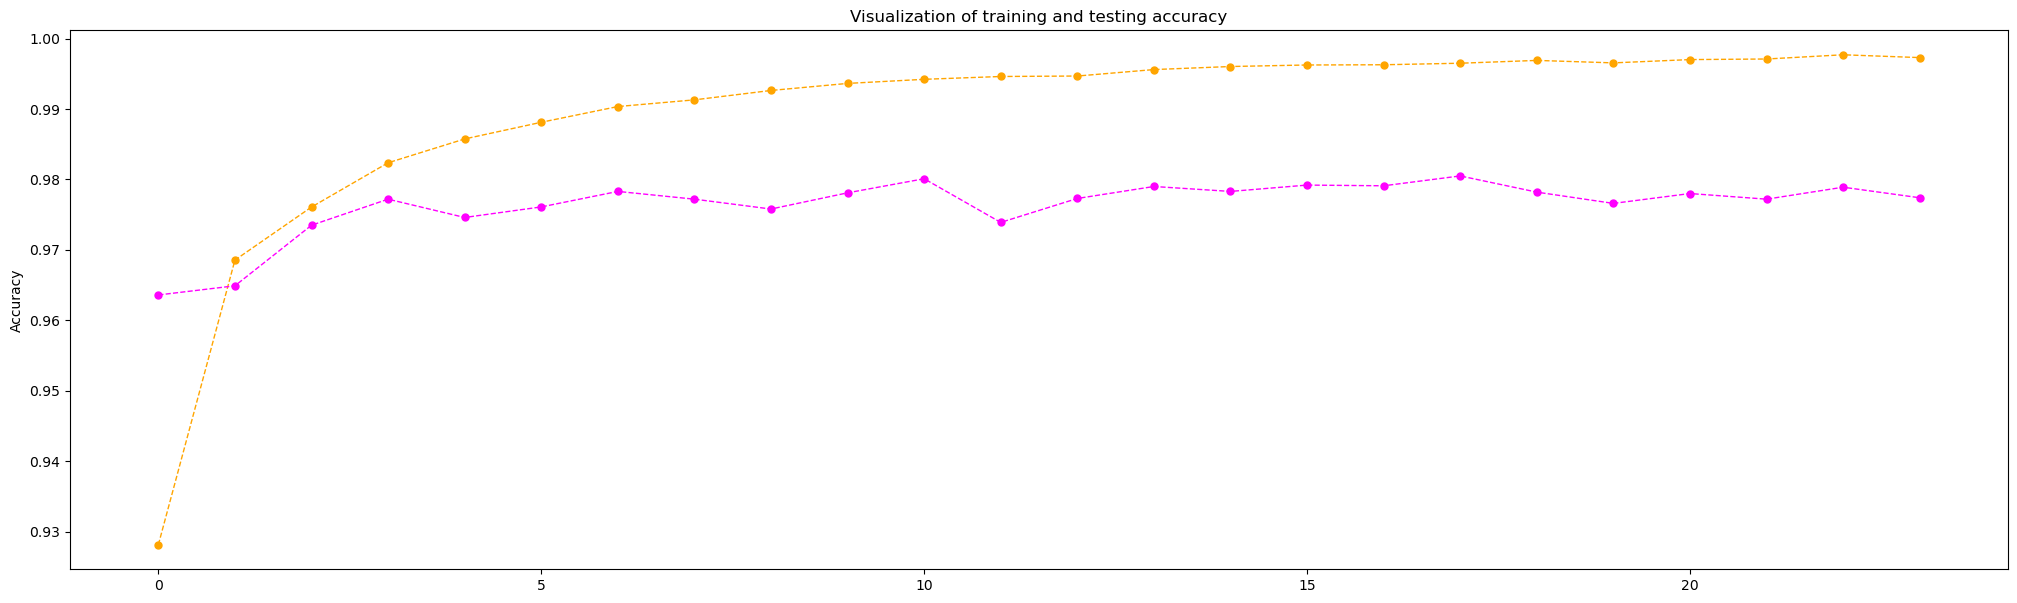

In [35]:
plt.figure(figsize = (25 , 7))
plt.plot(history.history['accuracy'] , color='orange', marker='o',
         linestyle='dashed',linewidth=1, markersize=5)    # Training Accuracy
plt.plot(history.history['val_accuracy'] , color='magenta', marker='o',
         linestyle='dashed',linewidth=1, markersize=5) # Testing Accuracy
plt.ylabel('Accuracy')
plt.title('Visualization of training and testing accuracy')
plt.show()

#### Insights : Accuracy is always closure to 1 is very good model and Loss(Error) is closure to 0 is very good model

#### Visualization of Loss (Training Error) and val Loss (Testing Error)

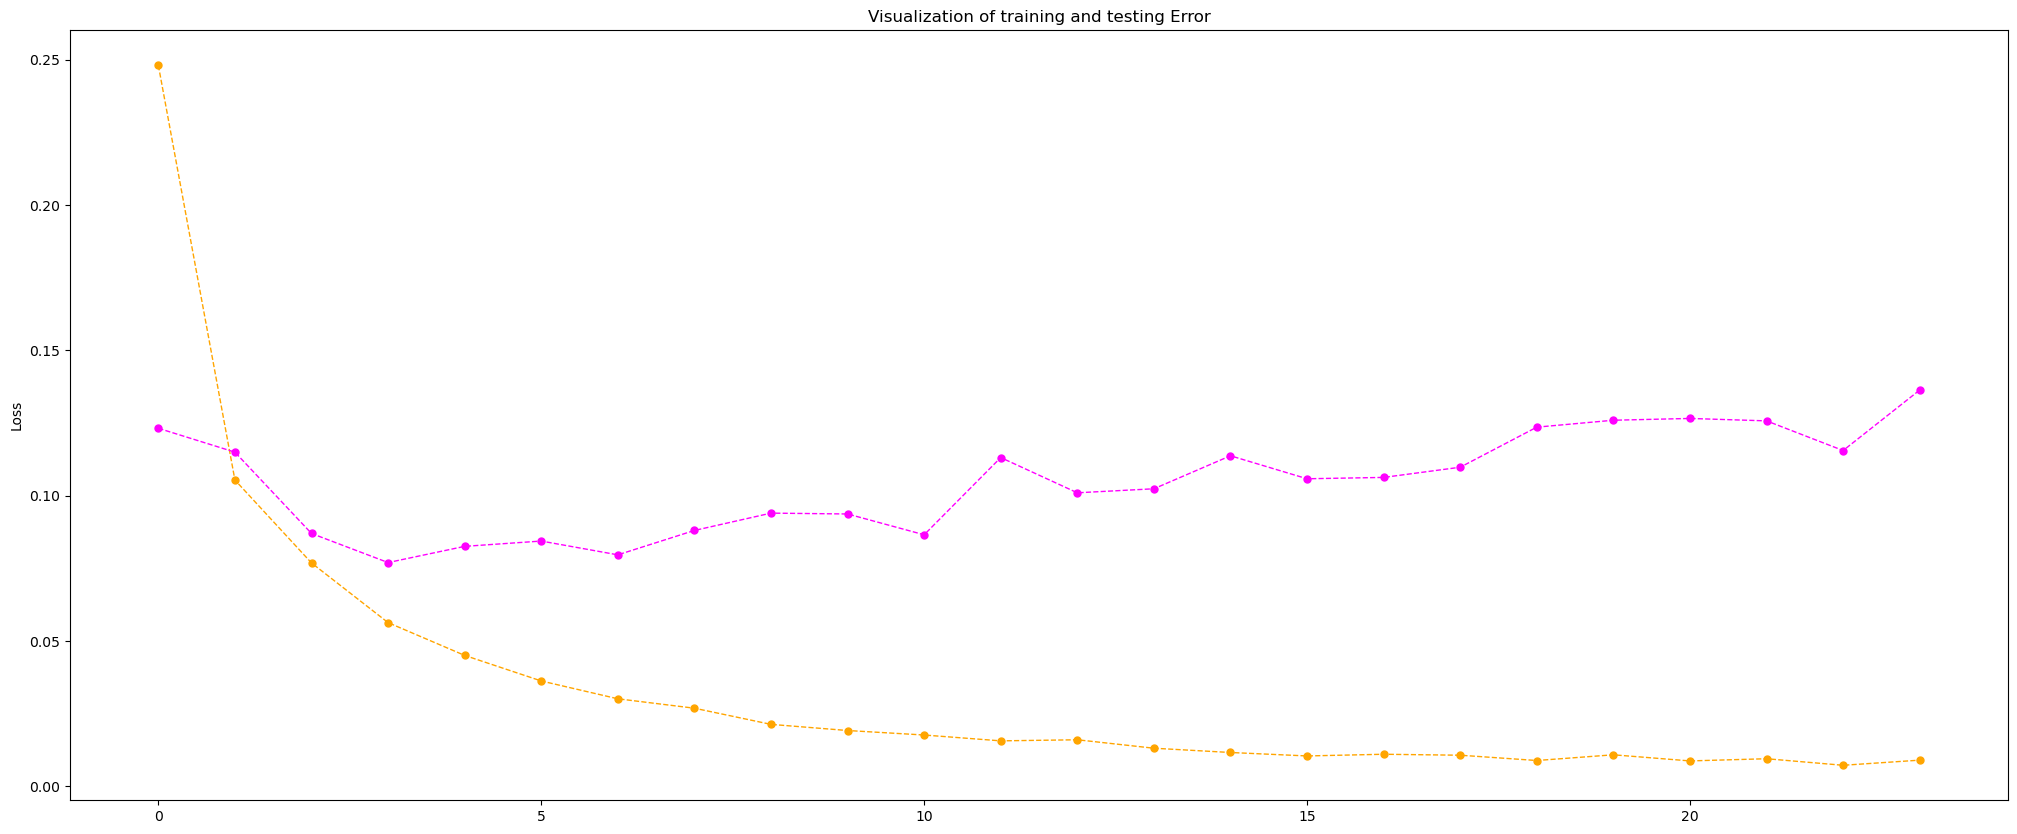

In [36]:
plt.figure(figsize = (25 , 10))
plt.plot(history.history['loss'],color='orange', marker='o',
         linestyle='dashed',linewidth=1, markersize=5)   # Loss (Training Error)
plt.plot(history.history['val_loss'],color='magenta', marker='o',
         linestyle='dashed',linewidth=1, markersize=5)    # val Loss (Testing Error)
plt.ylabel('Loss')
plt.title('Visualization of training and testing Error')
plt.show()